In [74]:
import os
os.chdir('/home/jovyan/work/src')
import reading
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
df = reading.read_lightcurve_vast('../notebooks/data/out04416.dat')

In [92]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 7 columns):
JD           7060 non-null object
Vrel         7060 non-null float64
err          7060 non-null float64
X            7060 non-null float64
Y            7060 non-null float64
aperture?    7060 non-null float64
file         7060 non-null object
dtypes: float64(5), object(2)
memory usage: 386.2+ KB
None


,JD,Vrel,err,X,Y,aperture?,file
0,2456818.73458,-11.066747,0.0076,212.42690,628.03302,4.8,../data/wwcra/cleaned/2014_noflat/WWCrA#30V_00...
1,2456837.53885,-12.197233,0.0038,1108.01904,691.61810,4.7,../data/wwcra/cleaned/2014_noflat/WWCrA#30V_00...
2,2456873.56387,-11.728661,0.0053,213.79140,635.93372,5.0,../data/wwcra/cleaned/2014_noflat/WWCrA#30V_00...
3,2456818.83685,-11.086948,0.0085,205.34869,615.40942,5.3,../data/wwcra/cleaned/2014_noflat/WWCrA#30V_00...
4,2456832.89221,-12.124833,0.0046,216.93040,630.92657,5.0,../data/wwcra/cleaned/2014_noflat/WWCrA#30V_00...


7060 7060


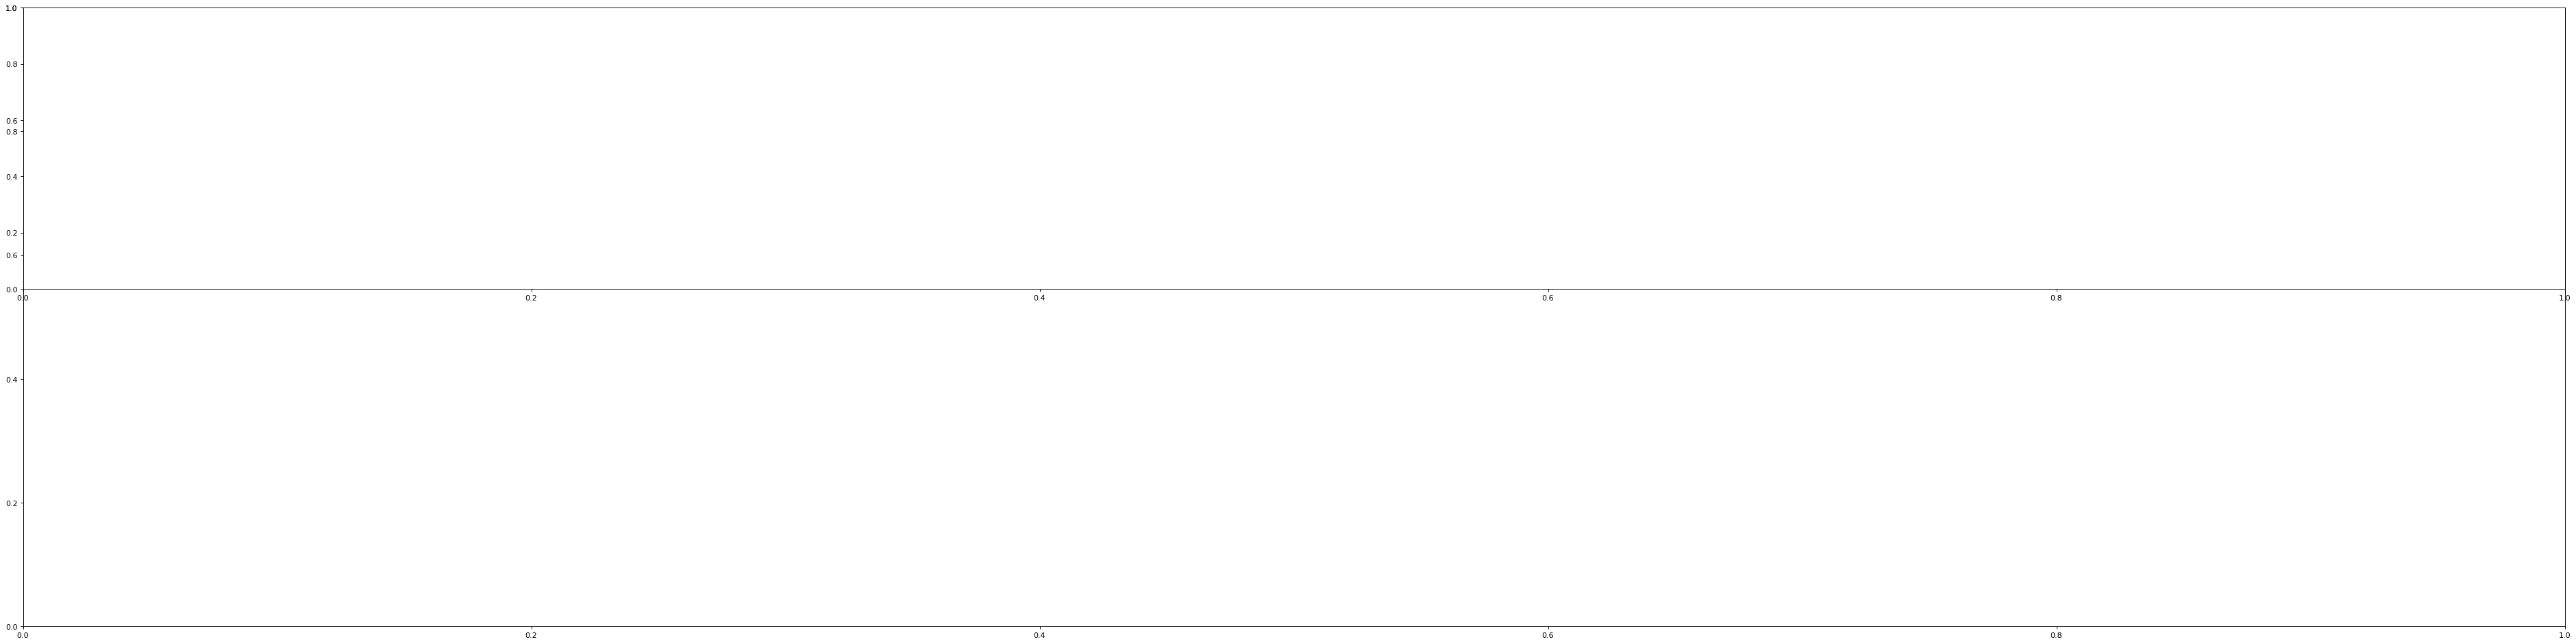

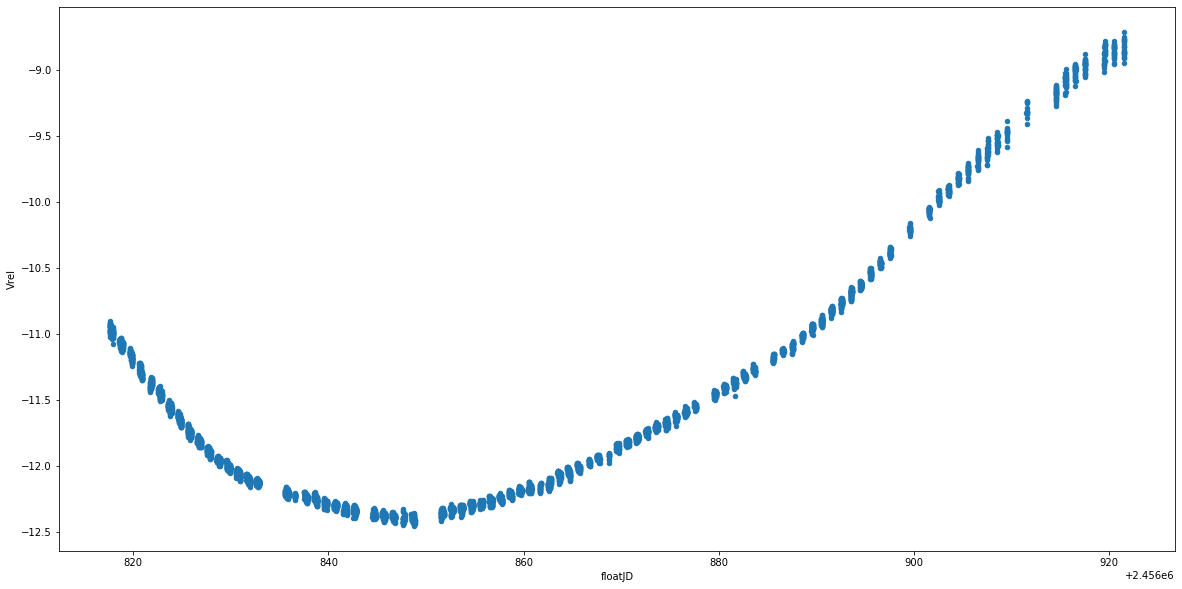

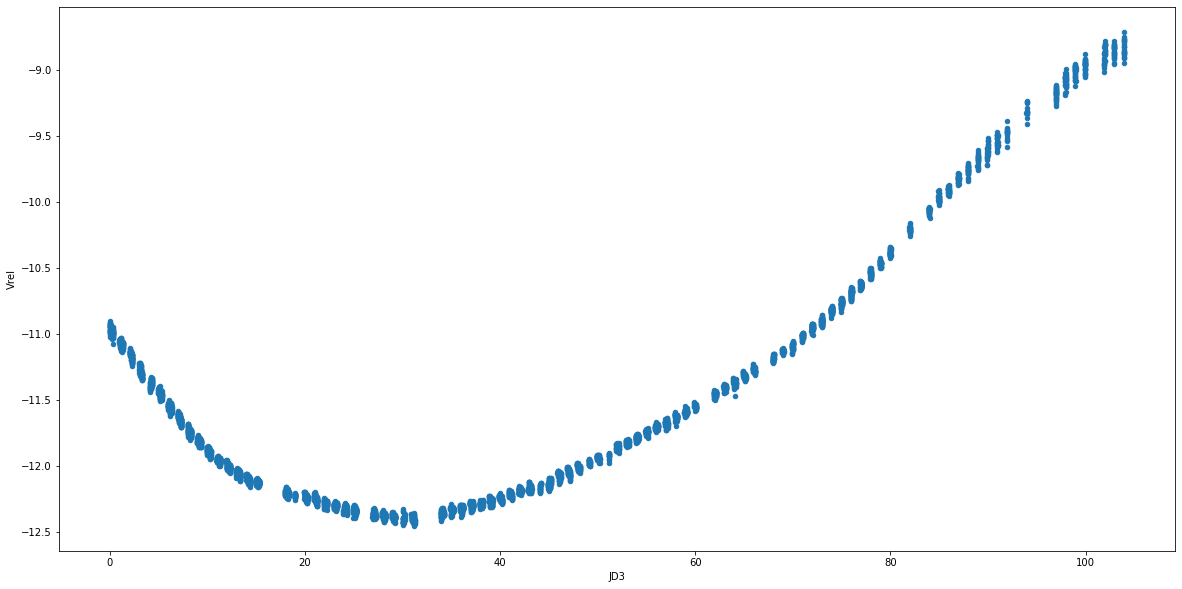

In [97]:
fig=plt.figure(figsize=(60, 15), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(211)
period = 200.30000

df['floatJD'] = df['JD'].astype(float)
df = df.sort_values(by=['floatJD'])
series = df['floatJD']
jds = series.to_numpy()
jds_norm_orig = np.subtract(jds, jds.min())
jds_norm = np.diff(jds_norm_orig)
jds_norm = np.mod(jds_norm, period)
jds_norm = np.concatenate(([jds_norm_orig[0]], jds_norm))
jds_norm = np.cumsum(jds_norm)
df['JD3'] = jds_norm
df.plot(x='floatJD', y='Vrel', kind='scatter', logx=False, figsize=(20,10), use_index=False)
df.plot(x='JD3', y='Vrel', kind='scatter', logx=False, figsize=(20,10), use_index=False)
print(len(df['floatJD']), len(df['JD3']))